In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:

# Load the dataset from the specified path
data = pd.read_csv('/content/drive/MyDrive/dataset_4.csv')

# Display basic information about the dataset
print(data.info())

# Display the first few rows to understand the structure of the dataset
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   1000 non-null   float64
 1   feature_2   1000 non-null   float64
 2   feature_3   1000 non-null   float64
 3   feature_4   1000 non-null   float64
 4   feature_5   1000 non-null   float64
 5   feature_6   1000 non-null   float64
 6   feature_7   1000 non-null   float64
 7   feature_8   1000 non-null   float64
 8   feature_9   1000 non-null   float64
 9   feature_10  1000 non-null   float64
 10  feature_11  1000 non-null   float64
 11  feature_12  1000 non-null   float64
 12  feature_13  1000 non-null   float64
 13  feature_14  1000 non-null   float64
 14  feature_15  1000 non-null   float64
 15  feature_16  1000 non-null   float64
 16  feature_17  1000 non-null   float64
 17  target      1000 non-null   object 
dtypes: float64(17), object(1)
memory usage: 140.8+ KB
None
   feature_1  

In [8]:
print(data.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   2.184037   0.483444  -1.591392   0.179448  -0.777793   0.109019   
1  -0.591096   0.993551   1.591419  -0.910918   1.575357  -0.728358   
2  -1.236405   0.136196  -0.851444   2.230818  -0.509955   0.411055   
3   1.804903   2.439023  -1.364115  -0.478763   1.121108  -0.956161   
4  -0.900630   0.132859  -0.876695  -0.109626  -3.672537  -3.026396   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0  -0.049921   0.074199   0.456040    0.335273   -2.293120   -0.890799   
1   1.329193   3.104317  -0.287206    6.309714   -3.579595    3.105253   
2   1.948598  -2.117605  -0.708127    3.209020   -0.512379    2.441059   
3   0.362347  -1.506067   0.377364    0.426759   -1.036911    2.569059   
4   0.420026   1.356922  -0.806770   -3.209374    2.218018    1.961846   

   feature_13  feature_14  feature_15  feature_16  feature_17 target  
0    0.590665    0.811727   -2.241954    0.296051    0.32

In [9]:
# Drop the target column for clustering
X = data.drop(columns=["target"])

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA-transformed data
pca_df = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])


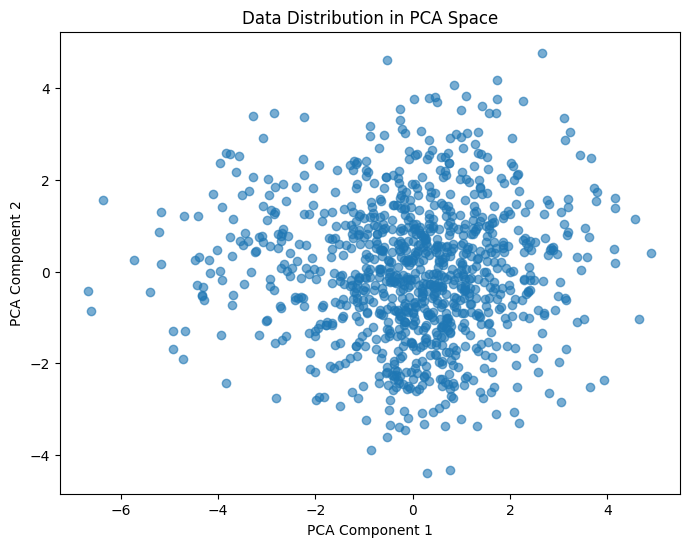

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
plt.title('Data Distribution in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


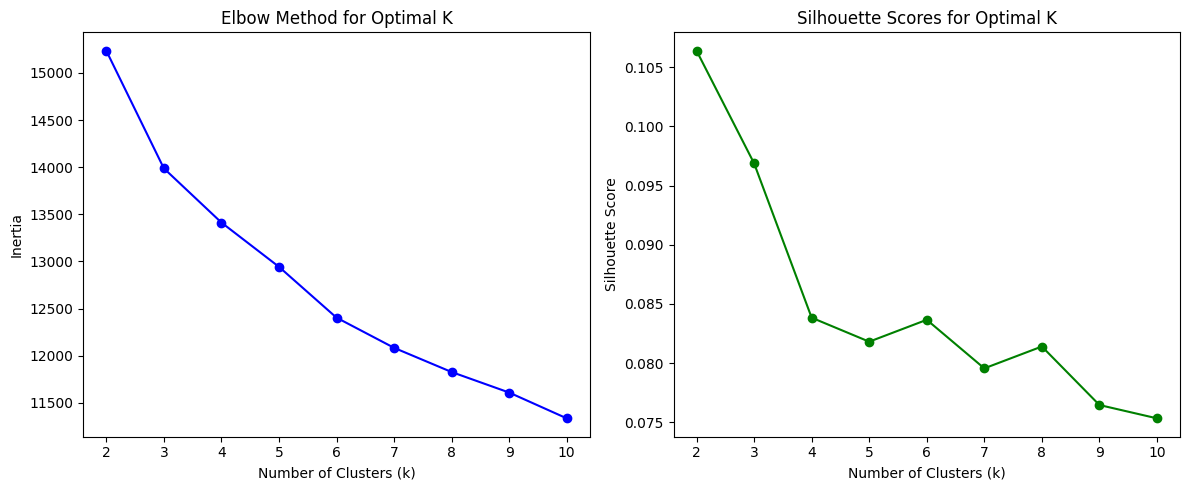

In [11]:
# Range of cluster values to test
cluster_range = range(2, 11)
inertia = []
silhouette_scores = []

# Perform KMeans for each k
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 5))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o', color='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [12]:
# Apply KMeans clustering with optimal k
optimal_k = 3  # Replace with the observed optimal value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to PCA-transformed data
pca_df["Cluster"] = clusters


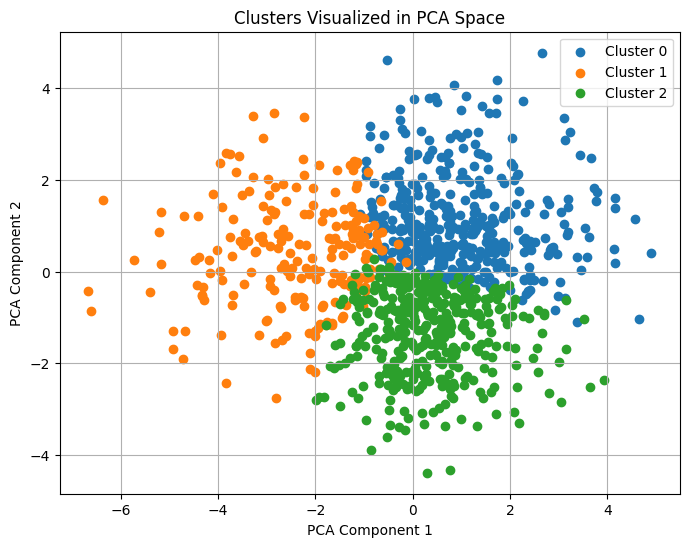

In [13]:
# Plot clusters in PCA space
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    subset = pca_df[pca_df["Cluster"] == cluster]
    plt.scatter(subset["PCA1"], subset["PCA2"], label=f"Cluster {cluster}")

plt.title('Clusters Visualized in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()


Cluster Centroids:
    feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.906263  -0.053436  -0.270194  -0.014747   1.467684  -0.676169   
1   0.744760  -0.044146   1.020855   0.077261   0.579959   1.630485   
2  -1.696742   0.096706  -1.679876   0.010041  -2.508292  -0.929010   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0   0.469904  -0.475585   0.075531    1.204351   -2.995668   -0.071279   
1  -1.178153  -1.201670  -0.116187   -1.799761    4.059913    1.714282   
2   0.328849  -1.191122  -0.083393   -0.436860    1.298419    0.141861   

   feature_13  feature_14  feature_15  feature_16  feature_17  
0    0.057118    1.828577    0.630551   -0.884662    0.387087  
1    0.050806   -4.845304   -0.506360    1.049904    1.190934  
2    0.005231    1.648159   -0.302827   -0.405463    1.253832  


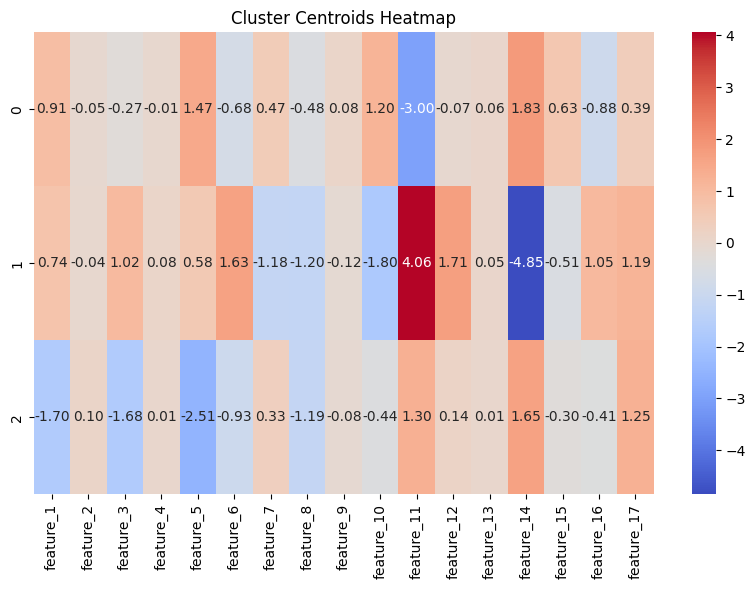

In [19]:
# Cluster centroids in the original feature space
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=X.columns)
print("Cluster Centroids:\n", centroids_df)

# Heatmap of cluster centroids
plt.figure(figsize=(10, 6))
sns.heatmap(centroids_df, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Cluster Centroids Heatmap")
plt.show()


In [17]:
# Add clusters and targets to compare
data["Cluster"] = clusters
print(data.groupby("Cluster")["target"].value_counts())


Cluster  target  
0        rock        178
         paper       126
         scissors     87
1        paper       192
         rock         16
         scissors      8
2        paper       183
         rock        148
         scissors     62
Name: count, dtype: int64


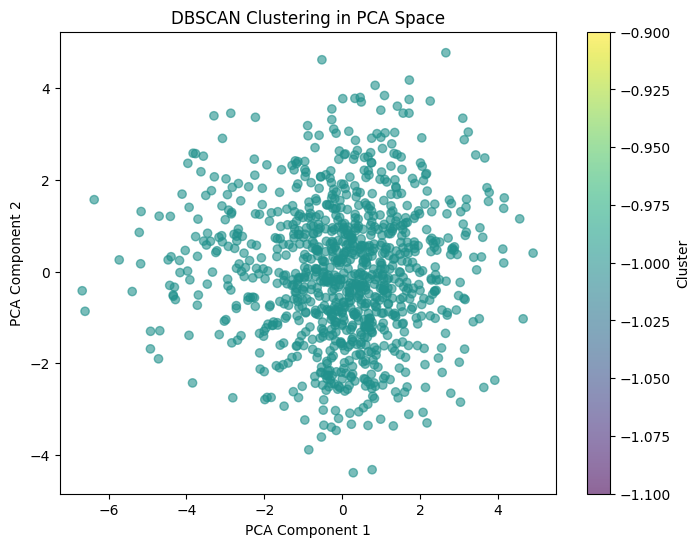

In [22]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN clusters
pca_df["DBSCAN Cluster"] = dbscan_labels
plt.figure(figsize=(8, 6))
plt.scatter(pca_df["PCA1"], pca_df["PCA2"], c=pca_df["DBSCAN Cluster"], cmap="viridis", alpha=0.6)
plt.title('DBSCAN Clustering in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [24]:
# Calculate Silhouette Score
silhouette = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette:.3f}")


Silhouette Score: 0.097
